In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

df = pd.read_csv("mission_launches.csv")

In [38]:
print(df.shape, "\n")
print(df.columns,"\n")

(4324, 9) 

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object') 



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [40]:
## Mayor cantidad de misiones por empresa en un año


df["Date"]=pd.to_datetime(df["Date"], format="mixed", utc=True)

df["Año"]=df["Date"].dt.year

lanzamientos_por_empresa=df.groupby(["Organisation", "Año"]).size().reset_index(name="Num_Lanzamientos")

año_deseado=2019#Cambiable

empresa_max_lanzamientos=lanzamientos_por_empresa[lanzamientos_por_empresa["Año"] == año_deseado].nlargest(1, "Num_Lanzamientos")

print(f"La empresa que mas lanzamientos realizo en {año_deseado} fue:\n{empresa_max_lanzamientos}")

La empresa que mas lanzamientos realizo en 2019 fue:
    Organisation   Año  Num_Lanzamientos
120         CASC  2019                27


In [41]:
##Conteo de misiones por empresa en un año

año_especifico=2019#Cambiable
df_filtrado=df[df["Año"]==año_especifico]
conteo_misiones_por_empresa=df_filtrado.groupby("Organisation").size().reset_index(name="Misiones")
print(conteo_misiones_por_empresa)

   Organisation  Misiones
0   Arianespace         9
1   Blue Origin         3
2          CASC        27
3        ExPace         5
4          Exos         3
5           ILS         1
6           ISA         3
7          ISRO         6
8          JAXA         1
9           MHI         1
10     Northrop         3
11     OneSpace         1
12   Rocket Lab         6
13    Roscosmos        13
14       SpaceX        13
15          ULA         5
16       VKS RF         8
17      i-Space         1


In [42]:
##Total de misiones de todas las empresas por año


año_especifico = 2019
df_filtrado = df[df["Año"] == año_especifico].shape[0]
print(f"Total de misiones en {año_especifico}: {df_filtrado}")

Total de misiones en 2019: 109


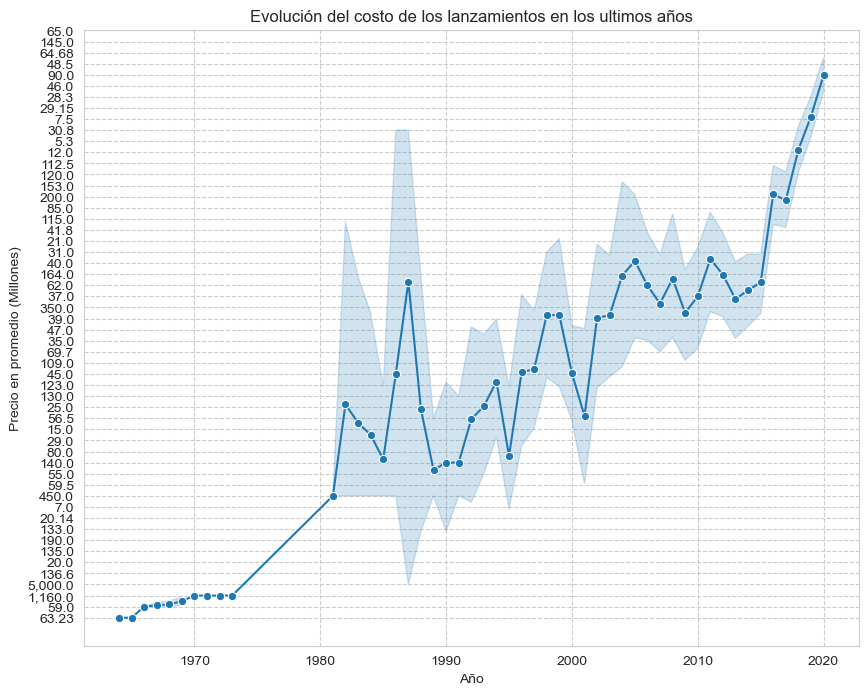

In [43]:
sns.set_style("whitegrid", {"grid.linestyle": "--"})
plt.figure(figsize=(10, 8))
sns.lineplot(x=df["Año"], y=df["Price"], data=df, marker="o",label="_nolegend_")
plt.ylabel("Precio en promedio (Millones)")
plt.xlabel("Año")
plt.title("Evolución del costo de los lanzamientos en los ultimos años")
plt.show()

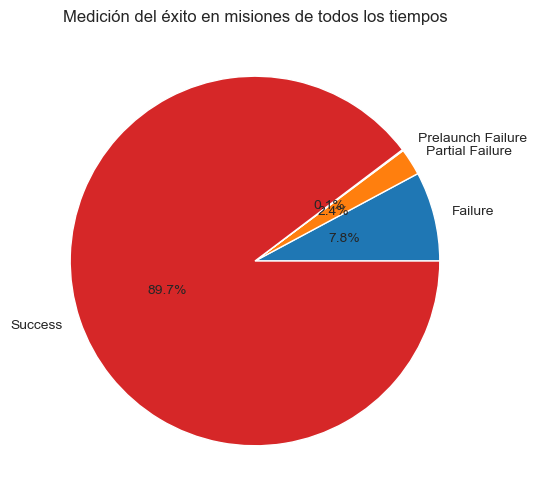

In [45]:
counts = df.groupby(["Organisation", "Mission_Status"]).size().unstack()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(counts.sum(), labels=counts.columns, autopct="%1.1f%%", pctdistance=0.5, wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.title("Medición del éxito en misiones de todos los tiempos")
plt.show()